In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler , StandardScaler 
from sklearn.metrics import  mean_absolute_error , mean_squared_error , r2_score
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("DATA.csv")
df

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN
5,VW,Up!,1000,929,105,NaN
6,Skoda,Fabia,1400,1109,90,NaN
7,Mercedes,A-Class,1500,1365,92,NaN
8,Ford,Fiesta,1500,1112,98,NaN
9,Audi,A1,1600,1150,99,NaN


In [4]:
df.drop(columns="Unnamed: 5" , inplace=True)
df

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [5]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [7]:
print("number of unique values in Car col:",df["Car"].nunique())
print("number of unique values in Model col:",df["Model"].nunique())

number of unique values in Car col: 17
number of unique values in Model col: 35


In [8]:
df.drop(columns="Model" , inplace=True)
df.drop(columns="Car" , inplace=True)
df

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105
5,1000,929,105
6,1400,1109,90
7,1500,1365,92
8,1500,1112,98
9,1600,1150,99


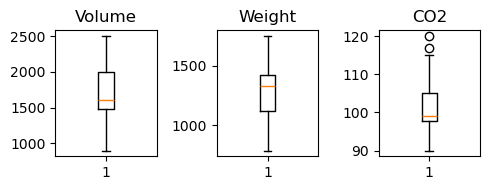

In [9]:
plt.figure(figsize=(5, 2))
for i, col in enumerate(df.columns, 1):
    plt.subplot(1, len(df.columns), i)  
    plt.boxplot(df[col])
    plt.title(col)  

plt.tight_layout()
plt.show()
    

In [10]:
for col in df.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    
    Lower_fience = Q1 - 1.5 * IQR
    Higher_fience = Q3 + 1.5 * IQR
    
    Lower_Outliers = df[df[col] < Lower_fience][col].values
    Higher_Outliers = df[df[col] > Higher_fience][col].values
    
    df[col].replace(Lower_Outliers , Lower_fience , inplace=True)
    df[col].replace(Higher_Outliers , Higher_fience , inplace=True)

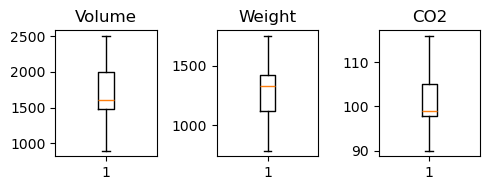

In [11]:
plt.figure(figsize=(5, 2))
for i, col in enumerate(df.columns, 1):
    plt.subplot(1, len(df.columns), i)  
    plt.boxplot(df[col])
    plt.title(col)  

plt.tight_layout()
plt.show()
    

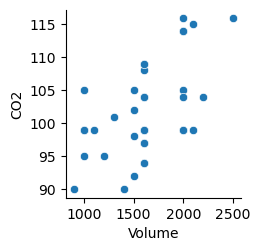

In [12]:
sns.pairplot(y_vars = 'CO2', x_vars = 'Volume' ,data = df)
plt.show()

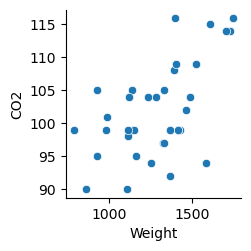

In [13]:
sns.pairplot(y_vars = 'CO2', x_vars = 'Weight' ,data = df)
plt.show()

<Axes: >

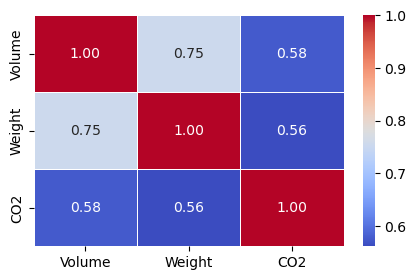

In [14]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)

In [15]:
X = df.drop(columns="CO2")
y = df["CO2"]

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.4 , random_state=42 )

In [17]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

In [18]:
y_pred

array([110.55335648,  97.8853773 , 101.9723557 , 107.25424542,
       100.30260491, 114.48312846,  99.5742223 ,  98.64556252,
       100.17784617, 121.20632857, 101.6152705 , 101.49116292,
       105.97709174,  98.48479751, 114.25743059])

In [19]:
print(f"Mean absolute error = {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean squared error = {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE = {mean_squared_error(y_test, y_pred)**0.5:.2f}")
print(f"R²   = {r2_score(y_test, y_pred):.2f}")

Mean absolute error = 4.39
Mean squared error = 37.79
RMSE = 6.15
R²   = 0.28


In [20]:
X_w = df[['Weight']]

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y, test_size=0.3, random_state=42)

poly_w = PolynomialFeatures(degree=3)
X_train_poly_w = poly_w.fit_transform(X_train_w)
X_test_poly_w = poly_w.transform(X_test_w)

model_w = LinearRegression()
model_w.fit(X_train_poly_w, y_train_w)
y_pred_w = model_w.predict(X_test_poly_w)

x_curve_w = np.linspace(X_w.min(), X_w.max(), 200).reshape(-1, 1)
x_curve_poly_w = poly_w.transform(x_curve_w)
y_curve_w = model_w.predict(x_curve_poly_w)


print(f"Mean absolute error = {mean_absolute_error(y_test_w, y_pred_w):.2f}")
print(f"Mean squared error = {mean_squared_error(y_test_w, y_pred_w):.2f}")
print(f"RMSE = {mean_squared_error(y_test_w, y_pred_w)**0.5:.2f}")
print(f"R²   = {r2_score(y_test_w, y_pred_w):.2f}")

Mean absolute error = 3.90
Mean squared error = 33.71
RMSE = 5.81
R²   = 0.42


In [21]:
# ========= 2. VOLUME ========= #
X_v = df[['Volume']]
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_v, y, test_size=0.3, random_state=42)


poly_v = PolynomialFeatures(degree=2)
X_train_poly_v = poly_v.fit_transform(X_train_v)
X_test_poly_v = poly_v.transform(X_test_v)

model_v = LinearRegression()
model_v.fit(X_train_poly_v, y_train_v)
y_pred_v = model_v.predict(X_test_poly_v)

x_curve_v = np.linspace(X_v.min(), X_v.max(), 200).reshape(-1, 1)
x_curve_poly_v = poly_v.transform(x_curve_v)
y_curve_v = model_v.predict(x_curve_poly_v)


print(f"Mean absolute error = {mean_absolute_error(y_test_v, y_pred_v):.2f}")
print(f"Mean squared error = {mean_squared_error(y_test_v, y_pred_v):.2f}")
print(f"RMSE = {mean_squared_error(y_test_v, y_pred_v)**0.5:.2f}")
print(f"R²   = {r2_score(y_test_v, y_pred_v):.2f}")

Mean absolute error = 4.85
Mean squared error = 30.99
RMSE = 5.57
R²   = 0.47


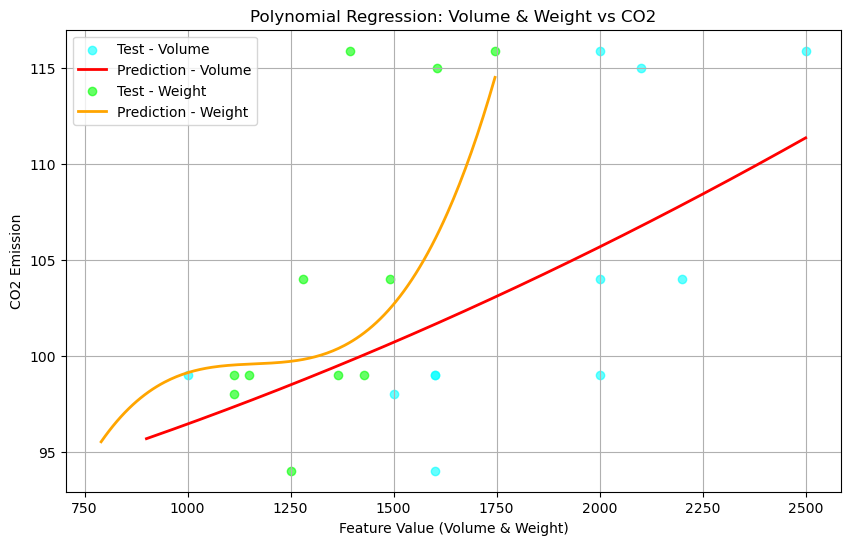

In [22]:
plt.figure(figsize=(10, 6))

# ---- Volume ----
plt.scatter(X_test_v, y_test_v, color='cyan', label='Test - Volume', alpha=0.6)
plt.plot(x_curve_v, y_curve_v, color='red', label='Prediction - Volume', linewidth=2)

# ---- Weight ----
plt.scatter(X_test_w, y_test_w, color='lime', label='Test - Weight', alpha=0.6)
plt.plot(x_curve_w, y_curve_w, color='orange', label='Prediction - Weight', linewidth=2)

plt.xlabel("Feature Value (Volume & Weight)")
plt.ylabel("CO2 Emission")
plt.title("Polynomial Regression: Volume & Weight vs CO2")
plt.legend()
plt.grid(True)
plt.show()

In [24]:

import  pickle
with open("model.pkl", "wb") as f:
    pickle.dump({
        "model": model,
        "poly": poly,
        "features": ["Volume", "Weight"]
    }, f)


# https://polynomial-co2-emission-linear-regression-iyenshis8ju64ckrxm9m.streamlit.app/